In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

In [3]:
df1 = pd.read_csv('data/strongdrink.txt')
df1.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Problem1.a

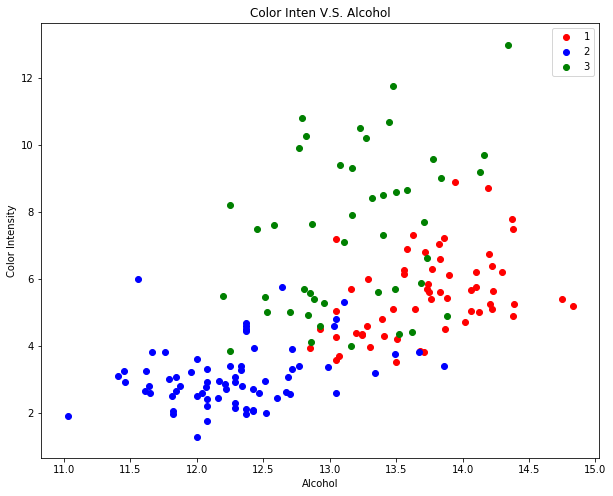

In [7]:
subset1 = df1[df1['cultivar'] == 1]
subset2 = df1[df1['cultivar'] == 2]
subset3 = df1[df1['cultivar'] == 3]
plt.scatter(subset1['alco'], subset1['color_int'], c="red", label=1)
plt.scatter(subset2['alco'], subset2['color_int'], c="blue", label=2)
plt.scatter(subset3['alco'], subset3['color_int'], c="green", label=3)
plt.xlabel("Alcohol") 
plt.ylabel("Color Intensity")
plt.title("Color Inten V.S. Alcohol")
plt.legend()

#### Problem1.b

In [6]:
X = df1[['alco', 'malic', 'tot_phen', 'color_int']]
y = df1['cultivar']
LogRegress = LogisticRegression()

param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}

random_search1 = RandomizedSearchCV(LogRegress, param_distributions=param_dist1, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search1.fit(X, y)

print('Best tuning parameters = ', random_search1.best_params_)
print('MSE of optimal results =', -random_search1.best_score_)

Best tuning parameters =  {'C': 9.565064414817147, 'penalty': 'l2'}
MSE of optimal results = 0.09571428571428572


#### Problem1.c

In [9]:
RandForest = RandomForestClassifier(bootstrap=True, oob_score=True)

param_dist2 = { 'n_estimators': sp_randint(10, 200),
                'max_depth': sp_randint(2, 4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

random_search2 = RandomizedSearchCV(RandForest, param_distributions=param_dist2, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search2.fit(X, y)
print('Best tuning parameters = ', random_search2.best_params_)
print('MSE of optimal results =', -random_search2.best_score_)

Best tuning parameters =  {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 18, 'min_samples_split': 13, 'n_estimators': 128}
MSE of optimal results = 0.12507936507936507


#### Problem 1.d

In [16]:
SVM = SVC(kernel="rbf")

param_dist3 = { 'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(SVM, param_distributions=param_dist3, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search3.fit(X, y)
print('Best tuning parameters = ', random_search3.best_params_)
print('MSE of optimal results =', -random_search3.best_score_)

Best tuning parameters =  {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}
MSE of optimal results = 0.1461904761904762


#### Problem 1.e

In [17]:
NN = MLPClassifier(solver='lbfgs')

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(NN, param_distributions=param_dist4, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search4.fit(X, y)
print('Best tuning parameters = ', random_search4.best_params_)
print('MSE of optimal results =', -random_search4.best_score_)

Best tuning parameters =  {'activation': 'relu', 'alpha': 0.23318052236376277, 'hidden_layer_sizes': 18}
MSE of optimal results = 0.0673015873015873


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Problem 1.f

The MSE of Neural Network is the  smallest among all. Thus, in the case of the Cultivar datasest, NN provides the best predictor.